Support Vector Machine:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1081
           1       0.72      0.68      0.70      1019

    accuracy                           0.71      2100
   macro avg       0.71      0.71      0.71      2100
weighted avg       0.71      0.71      0.71      2100

Random Forest:
              precision    recall  f1-score   support

           0       0.72      0.80      0.76      1081
           1       0.76      0.67      0.71      1019

    accuracy                           0.74      2100
   macro avg       0.74      0.74      0.74      2100
weighted avg       0.74      0.74      0.74      2100



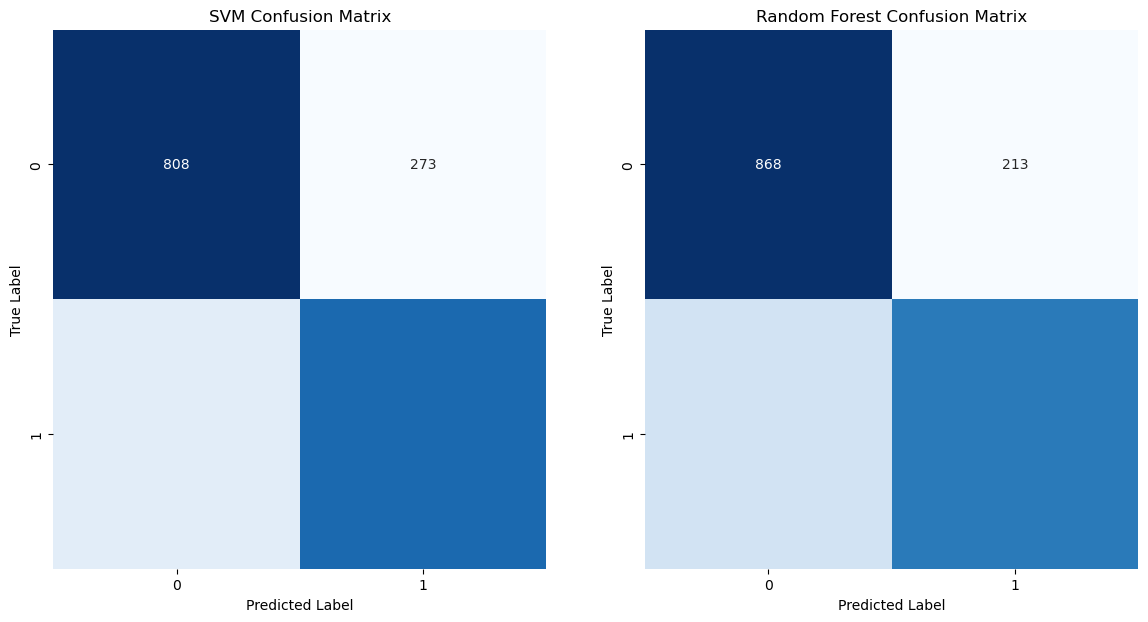

In [2]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split

# Cargar el conjunto de datos
df = pd.read_csv('cardio_train.csv', sep=';')

# Dividir los datos en conjunto de entrenamiento y prueba
X = df.drop('cardio', axis=1)
y = df['cardio']
X, _, y, _ = train_test_split(X, y, train_size=0.1, stratify=y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Cargar los mejores modelos entrenados
best_model_svm = joblib.load('best_model_svm.pkl')
best_model_rf = joblib.load('best_model_rf.pkl')

# Evaluar los modelos en el conjunto de prueba
y_pred_svm = best_model_svm.predict(X_test)
y_pred_rf = best_model_rf.predict(X_test)

# Imprimir métricas de evaluación
print("Support Vector Machine:")
print(classification_report(y_test, y_pred_svm))
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Visualizar la matriz de confusión
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()
